##*EMPLOYEE ATTRITION PREDICTION SYSTEM*

####When workers depart and their positions are not filled, an organization's workforce gradually shrinks. This phenomenon is known as **employee attrition**.



####The Employee Attrition prediction system aims to develop a predictive analytics model that accurately forecasts which employees are most likely to leave the company by utilizing IBM HR analytics data. Models for machine learning, including Support Vector Machine, Random Forest, Decision Tree, and Logistic Regression, are used and assessed.

##Importing Required Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve,auc

##Loading IBM HR Analytics Dataset

In [3]:
data = pd.read_csv(r'G:\My Drive\Colab Notebooks\Employee Attrition Project\data\WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

##Displaying basic information

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.shape

(1470, 35)

In [8]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##Data Cleaning

This process involves removing irrelevant columns (e.g., EmployeeNumber, EmployeeCount, Over18, StandardHours) and encoding categorical variables (e.g., Attrition, BusinessTravel) into numerical values using LabelEncoder. This prepares the data for modeling by ensuring all features are numerical.

In [10]:
data_cleaned = data.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [11]:
# Encode categorical variables using Label Encoder
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])

##Display Information of Cleaned Data using Label Encoder

In [12]:
print(data_cleaned.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [13]:
data_cleaned.shape

(1470, 31)

##Exploratory Data Analysis(EDA)


EDA is a crucial step to understand the dataset's structure, distributions, relationships, and potential patterns before modeling.

1.  EDA for the IBM HR Employee Attrition dataset entails examining correlations, visualizing distributions, summarizing statistics, and identifying missing values.
2. This aids in determining the main variables affecting attrition, such as age and job satisfaction.

####1. Distribution of Target Variable(Attrition)

*   Count plot for Employee Attrition
*   Attrition Count and Percentage





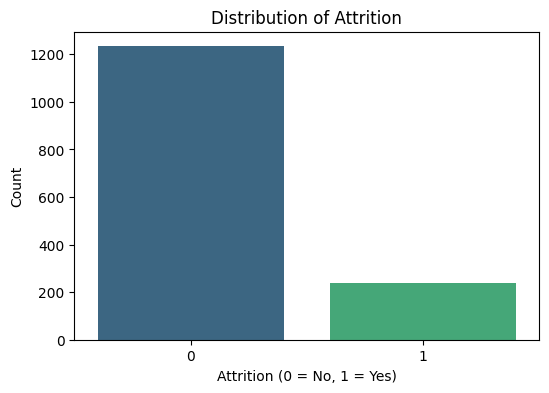

In [14]:
# Count plot for Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition',hue='Attrition', data=data_cleaned, palette='viridis',legend=False)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [15]:
# Percentage
attrition_counts = data_cleaned['Attrition'].value_counts()
print("Attrition Distribution:")
print(attrition_counts)
print("\nPercentages:")
percentages = (attrition_counts / len(data_cleaned) * 100).round(2)
print(percentages)

Attrition Distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64

Percentages:
Attrition
0    83.88
1    16.12
Name: count, dtype: float64


####2. Univariate Analysis

*   Numerical Features - To find skewness or outliers, use box plots and histograms to analyze the distributions of important numerical features.
*   Categorical Features - Use count plots to examine categorical features such as gender or department.



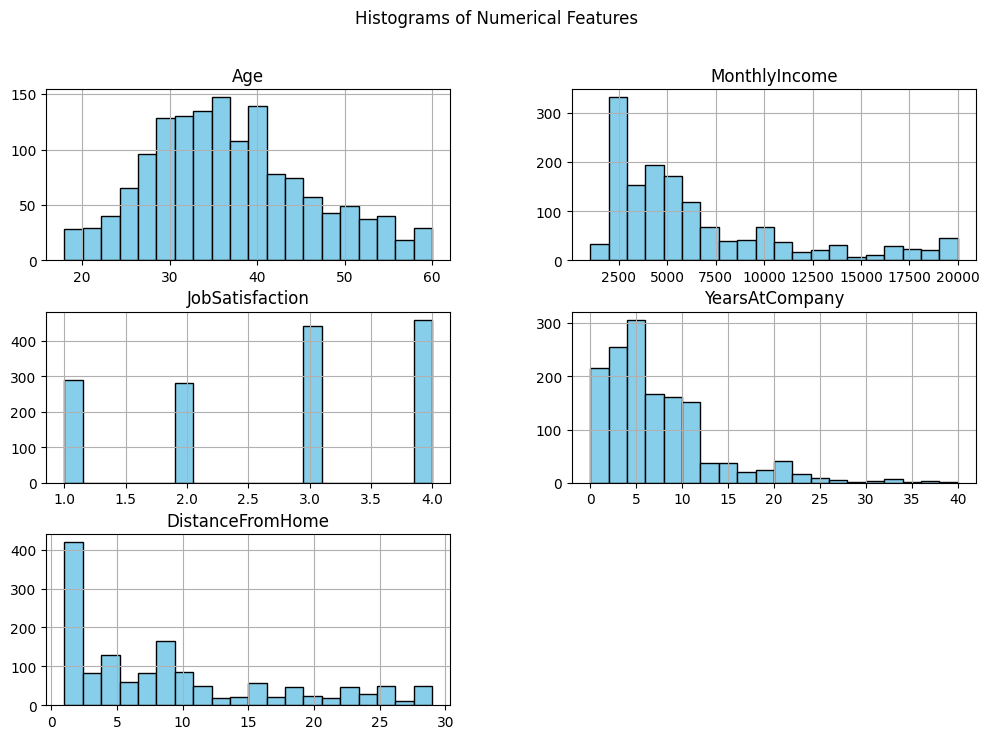

In [16]:
# Select numerical features
numerical_features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany', 'DistanceFromHome']
# display key numerical features using histograms
data_cleaned[numerical_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

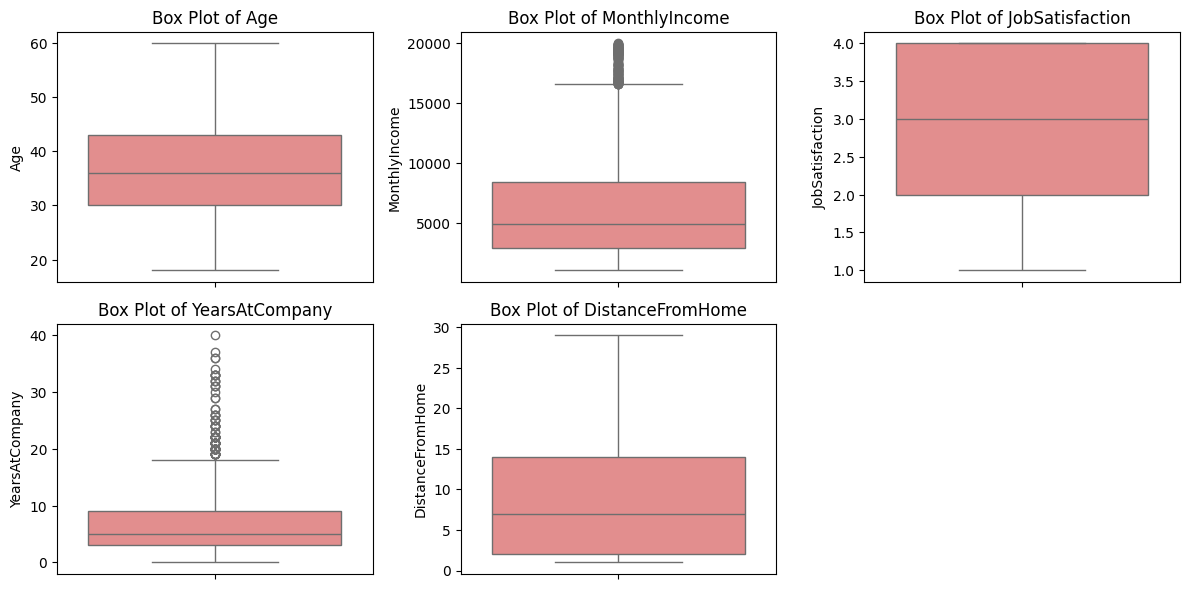

In [17]:
# Box plots to detect skewness of key numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_cleaned[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

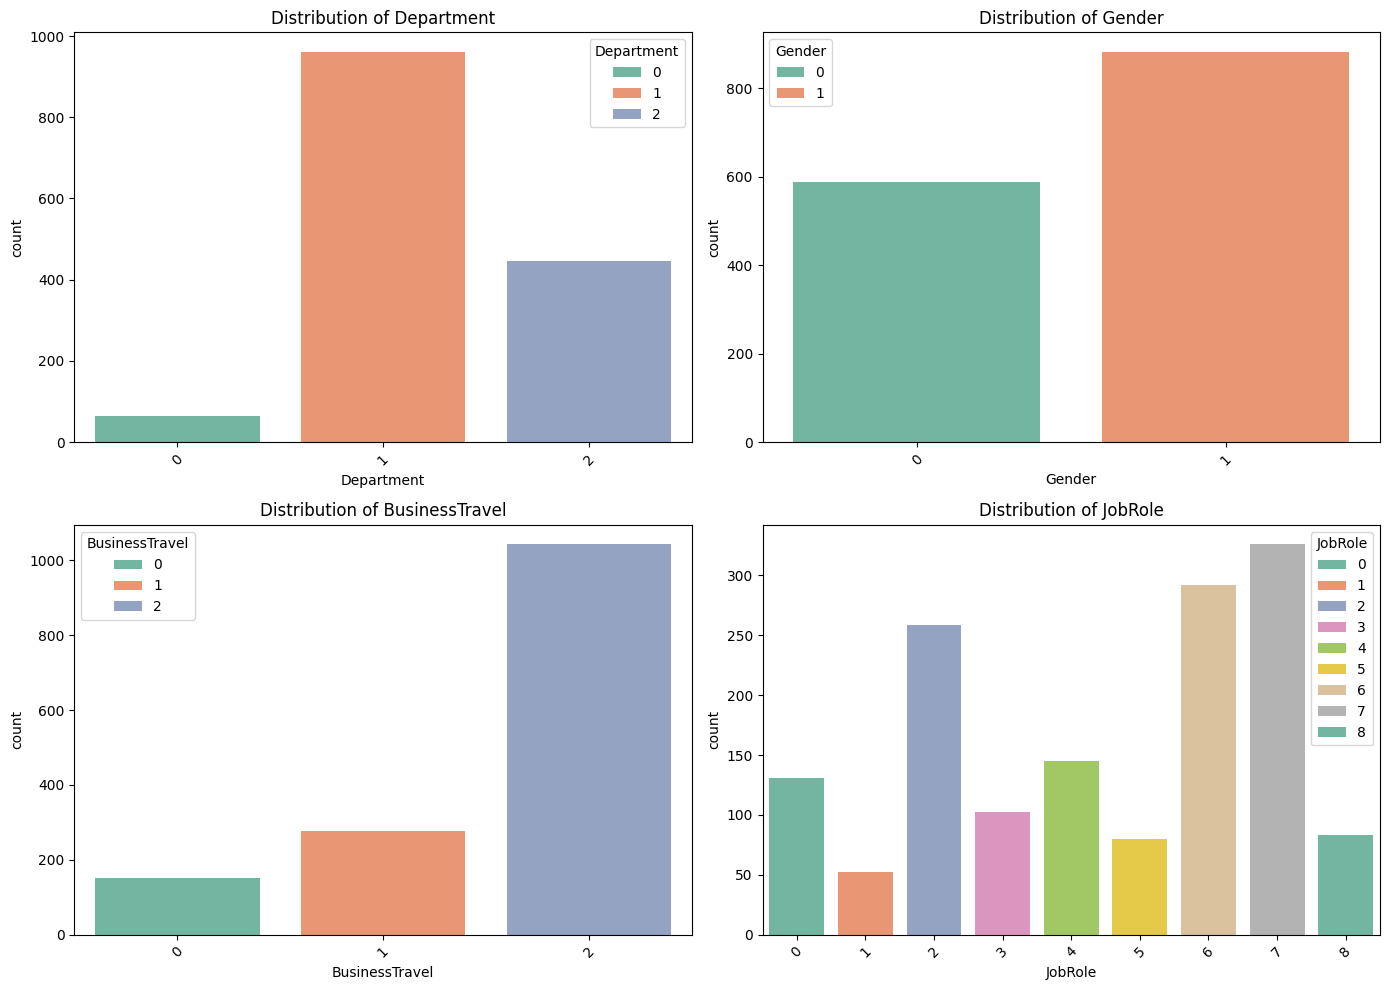

In [18]:
# Select key categorical features
categorical_features = ['Department', 'Gender', 'BusinessTravel', 'JobRole']
# display distribution count plots for the key categorical features
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col,hue=col, data=data_cleaned, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####3. Bivariate Analysis - Using box plots or bar plots, investigate the connections between features and attrition to find trends.

* Attrition may be higher among younger workers and those with lower incomes and levels of satisfaction.

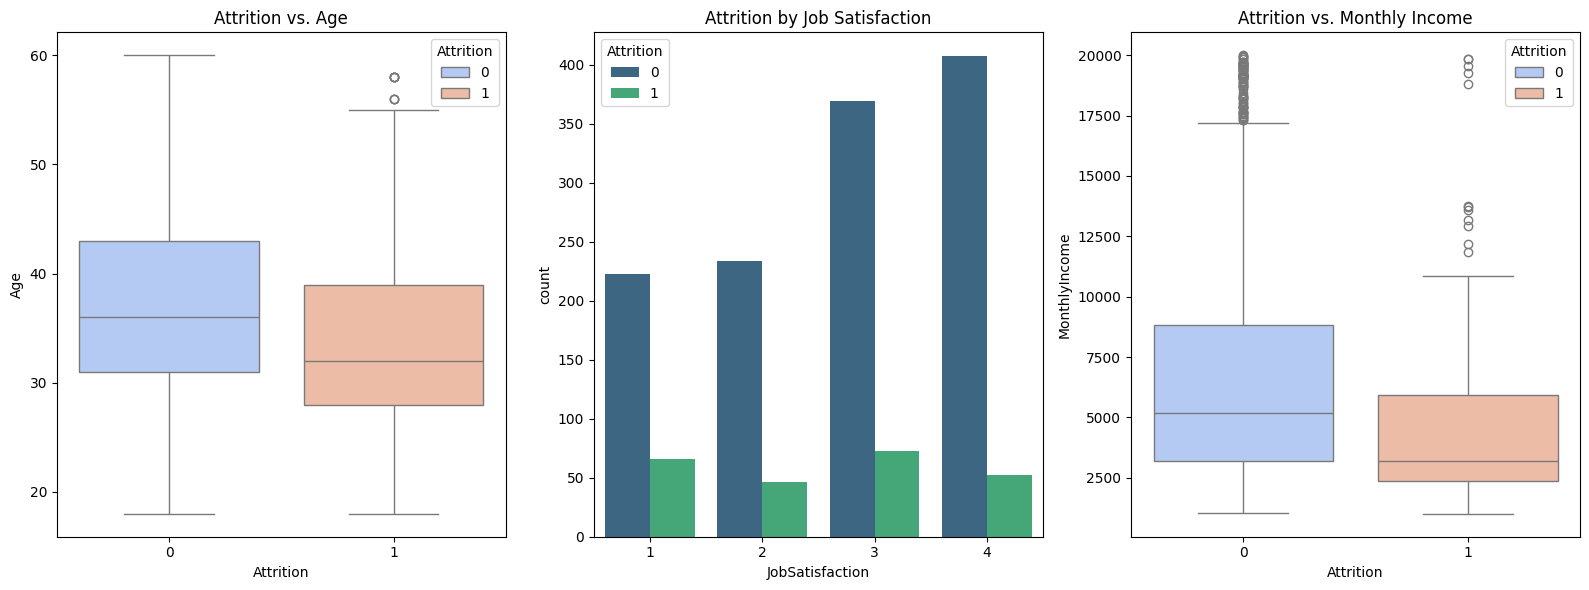

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
# Attrition vs. Age
sns.boxplot(x='Attrition',hue='Attrition', y='Age', data=data_cleaned, palette='coolwarm',ax=axes[0])
axes[0].set_title('Attrition vs. Age')

# Attrition vs. JobSatisfaction
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data_cleaned, palette='viridis',ax=axes[1])
axes[1].set_title('Attrition by Job Satisfaction')

# Attrition vs. MonthlyIncome
sns.boxplot(x='Attrition',hue='Attrition', y='MonthlyIncome', data=data_cleaned, palette='coolwarm',ax=axes[2])
axes[2].set_title('Attrition vs. Monthly Income')

plt.tight_layout()
plt.show()

####4. Correlation Matrix - To identify multicollinearity and attrition-related relationships, visualize feature correlations.

* Heatmap: For instance, there is a strong correlation between JobLevel and MonthlyIncome.
* The two strongest correlations are job satisfaction (negative) and overtime (positive).

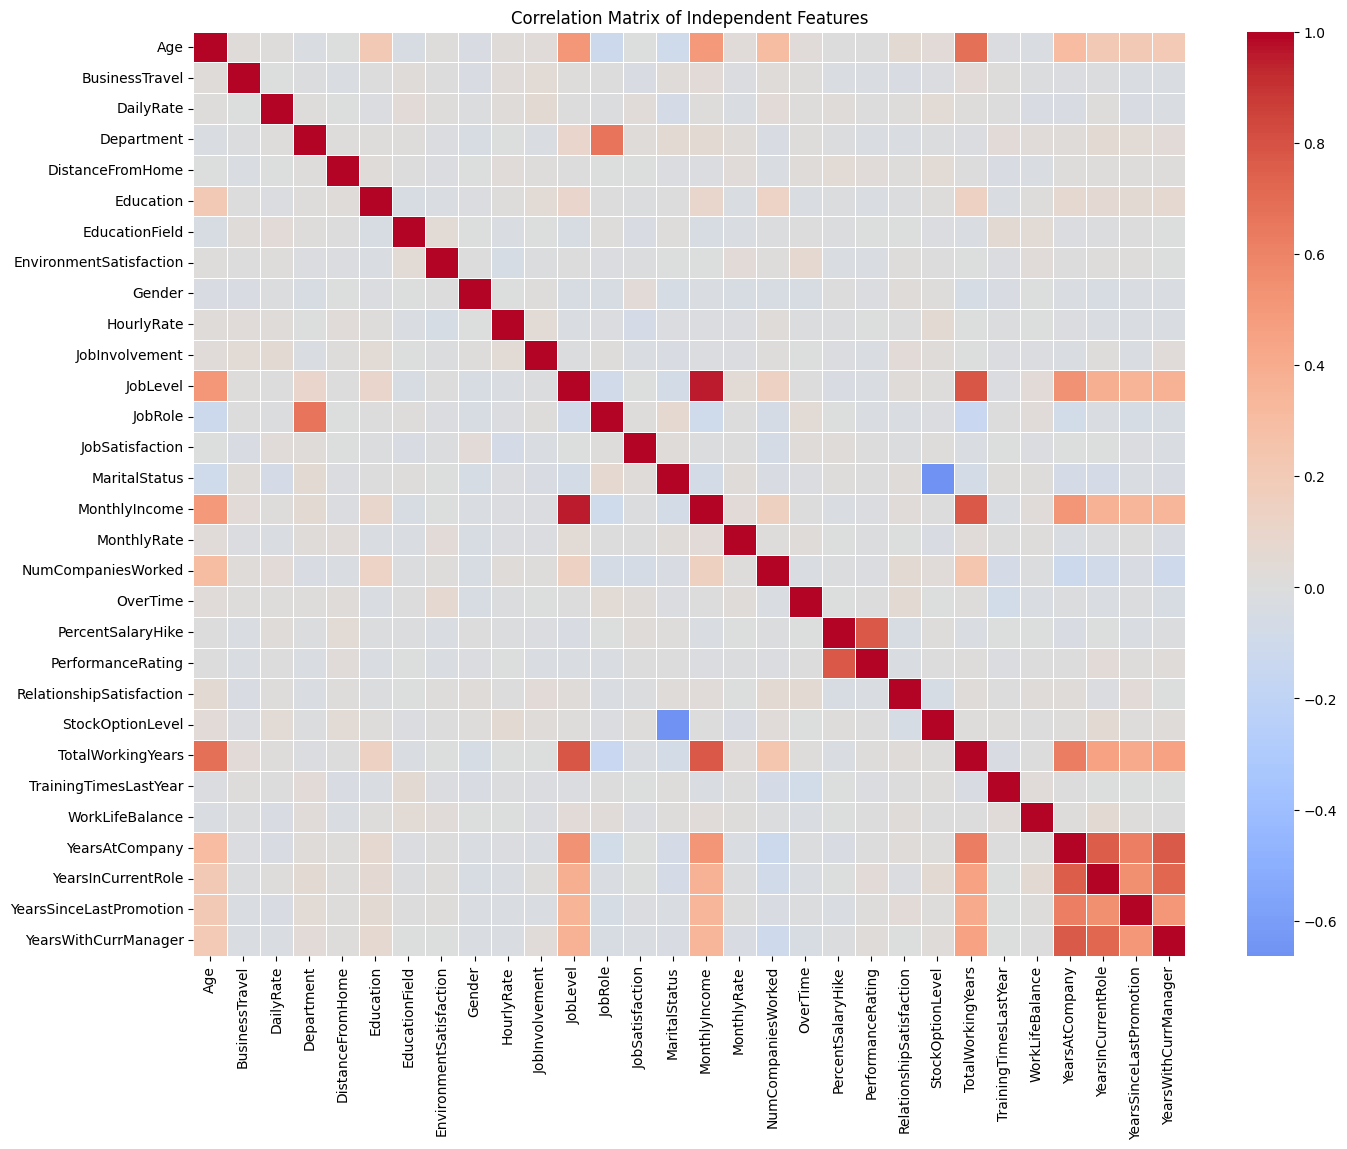

In [20]:
# Compute the correlation matrix(excluding Attrition for feature-only matrix)
C = data_cleaned.drop("Attrition", axis=1)
corr_matrix = C.corr()
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Independent Features")
plt.show()

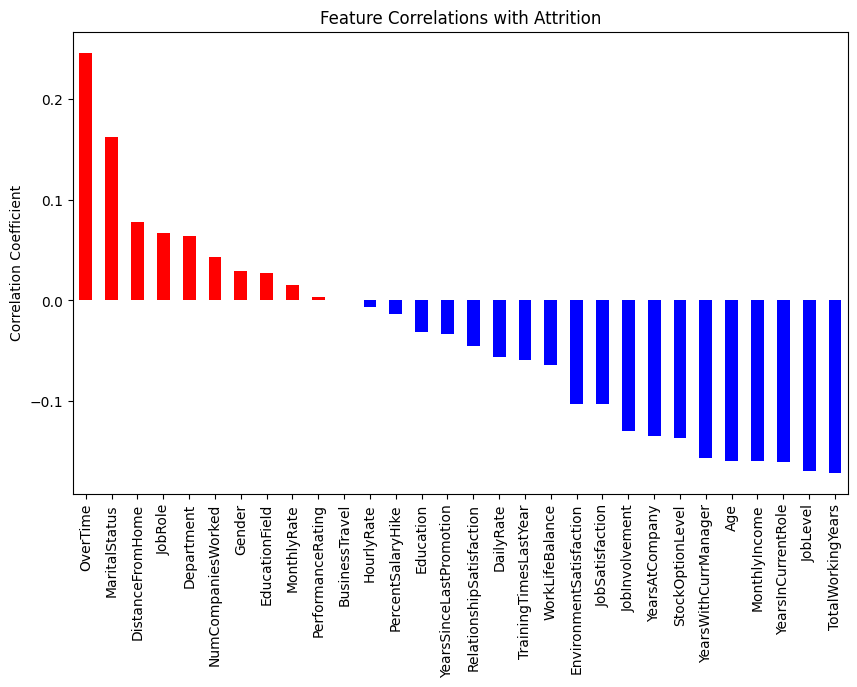

In [21]:
# Correlation with Attrition for identifying the positive and negative correlations
attrition_corr = data_cleaned.corr()['Attrition'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
attrition_corr.drop('Attrition').plot(kind='bar', color=['red' if x > 0 else 'blue' for x in attrition_corr.drop('Attrition')])
plt.title('Feature Correlations with Attrition')
plt.ylabel('Correlation Coefficient')
plt.show()


##Splitting Data into Training and Testing Sets

####Divide the features and target into 80% training and 20% testing sets, scale the features, and separate the features.

In [22]:
X = data_cleaned.drop(columns=["Attrition"])
y = data_cleaned["Attrition"]

In [23]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [24]:
# Feature scaling (important for Logistic Regression and SVM)
scaler = StandardScaler()
num_cols = data_cleaned.select_dtypes(include=['int64','float64']).columns
data_cleaned[num_cols] = scaler.fit_transform(data_cleaned[num_cols])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

##1. Logistic Regression  
* A sigmoid function is used in this linear model for binary classification to predict probabilities. Easy to understand and suitable for baseline.

In [26]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [27]:
# Get predicted probabilities (sigmoid output)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy_lr:.4f}")
print(report_lr)

Accuracy: 0.8741
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



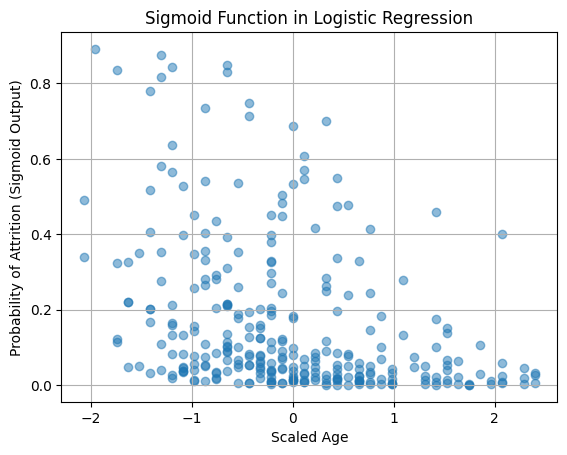

In [28]:
# Plot sigmoid curve for Age
feature_values = X_test.iloc[:, 0]
plt.scatter(feature_values, y_prob, alpha=0.5, label='Predicted Probabilities')
plt.xlabel('Scaled Age')
plt.ylabel('Probability of Attrition (Sigmoid Output)')
plt.title('Sigmoid Function in Logistic Regression')
plt.grid(True)
plt.show()

##2. Decision Tree
* A decision-making model based on trees that separates data based on features. Despite being easy to visualize, it is susceptible to overfitting.

In [29]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
# Predictions
y_pred_dt_labels = dt_model.predict(X_test)
# Evaluate model
accuracy_dt = accuracy_score(y_test, y_pred_dt_labels)
report_dt = classification_report(y_test, y_pred_dt_labels, output_dict=True)
print(f"Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt_labels))

Accuracy: 0.7823
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.32      0.32      0.32        47

    accuracy                           0.78       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294



##3. Random Forest
* An ensemble of decision trees averages predictions to increase accuracy and decrease overfitting which effectively manages non-linear data.

In [32]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate model
accuracy_rf= accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(report_rf)

Accuracy: 0.8435
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.54      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.70      0.56      0.57       294
weighted avg       0.81      0.84      0.80       294



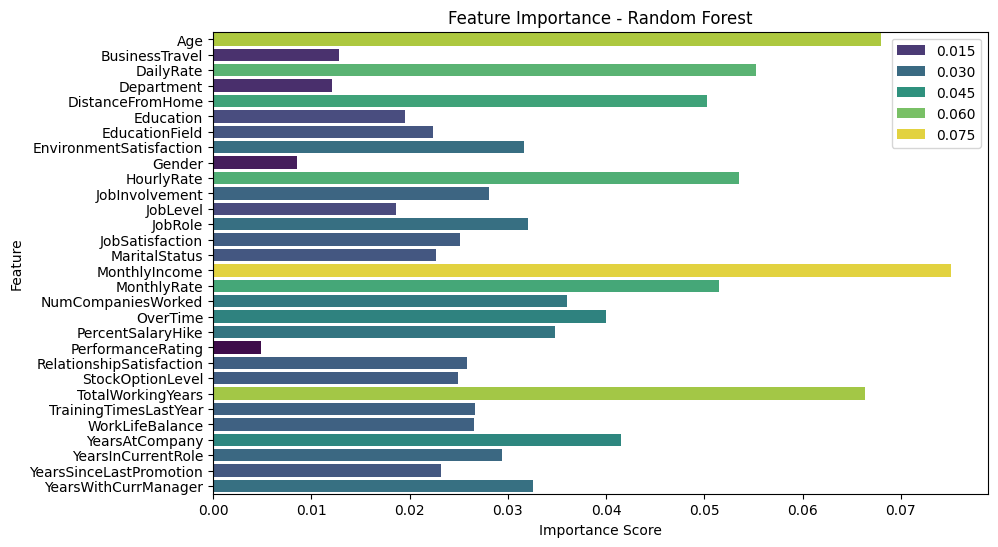

In [34]:
# Feature Importance Plot for Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances,hue=feature_importances, y=features, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()

##4. Support Vector Machine
* Identifies the best hyperplane for class separation; works well with high-dimensional data and kernel tricks (like RBF).

In [35]:
# Train SVM model
svm_model = SVC(kernel="rbf",probability=True, random_state=42)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
# Predictions
y_pred_svc = svm_model.predict(X_test)
# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svc)
report_svm = classification_report(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svm:.4f}")
print(report_svm)


Accuracy: 0.8537
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.67      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.76      0.58      0.59       294
weighted avg       0.83      0.85      0.82       294



##Ensemble Stacking
* In machine learning, ensemble stacking is a potent meta-learning technique that combines several base models to enhance predictive performance, particularly for classification tasks like employee attrition prediction.

####Implementation of Stacking
* As base learners, use current models (SVM, Random Forest, Decision Tree,Gradient Boosting, and Logistic Regression).
* Meta-Learner: A simple model (e.g., Random Forest) that learns from base model predictions.
* Cross-Validation: To prevent overfitting, use k-fold CV to produce out-of-fold predictions for the meta-learner's training.
* Evaluation: Examine the accuracy of individual and stacked models.

In [37]:
base_models = [
    ('logistic_regression', LogisticRegression(max_iter=3000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=120, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=150, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

###XG Boosting Classifier as Meta Learner

In [44]:
meta = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

In [45]:
# Create stacking classifier
stack = StackingClassifier(
    estimators=base_models,
    final_estimator=meta,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    passthrough=True,
    n_jobs=-1
)
# Train the stacking model
stack.fit(X_train, y_train)

,estimators,"[('logistic_regression', ...), ('decision_tree', ...), ...]"
,final_estimator,"XGBClassifier...ree=None, ...)"
,cv,StratifiedKFo... shuffle=True)
,stack_method,'auto'
,n_jobs,-1
,passthrough,True
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [46]:
# Predict on test data
y_pred_stacking = stack.predict(X_test)

In [47]:
if hasattr(stack, "predict_proba"):
    y_prob_stacking = stack.predict_proba(X_test)[:, 1]
else:
    # fallback: use decision_function if available
    y_prob = stack.decision_function(X_test)

acc = accuracy_score(y_test, y_pred_stacking)
print(f"\nStacking (XGBoost meta) Accuracy: {acc*100:.2f}%")

print("\nClassification Report :")
print(classification_report(y_test, y_pred_stacking, zero_division=0))


Stacking (XGBoost meta) Accuracy: 85.37%

Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.28      0.38        47

    accuracy                           0.85       294
   macro avg       0.73      0.62      0.65       294
weighted avg       0.83      0.85      0.83       294



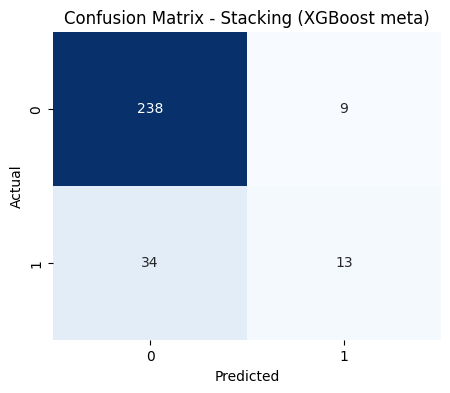

In [48]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Stacking (XGBoost meta)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

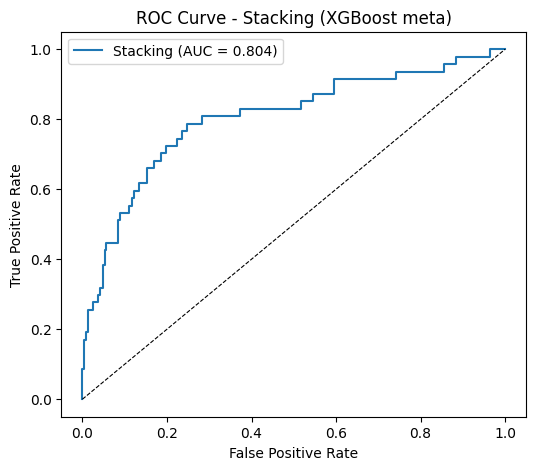

ROC-AUC: 0.8039


In [49]:
# ROC-AUC
try:
    fpr, tpr, _ = roc_curve(y_test, y_prob_stacking)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'Stacking (AUC = {roc_auc:.3f})')
    plt.plot([0,1],[0,1],'k--', linewidth=0.8)
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Stacking (XGBoost meta)')
    plt.legend(); plt.show()
    print(f"ROC-AUC: {roc_auc:.4f}")
except Exception as e:
    print("Could not compute ROC-AUC:", e)